In [1]:
import pandas as pd
import numpy as np

In [2]:
boulder = pd.read_csv('boulder.csv', index_col = None)

In [3]:
boulder.head()

,SALE.TYPE,HOME.TYPE,ADDRESS,CITY,STATE,ZIP,LIST.PRICE,BEDS,BATHS,LOCATION,...,LAST.SALE.PRICE,URL..SEE.http...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.,SOURCE,LISTING.ID,ORIGINAL.SOURCE,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,IS.SHORT.SALE
0,MLS Listing,Single Family Residential,1029 Paragon Dr,Boulder,CO,80303,895000,4.0,2.50,Tr Nbc 140 148 152,...,NaN,http://www.redfin.com/CO/Boulder/1029-Paragon-...,"Information and Real Estate Services, LLS (IRES)",715573,RE/MAX Alliance-Boulder,N,Y,39.977175,-105.183189,False
1,MLS Listing,Single Family Residential,300 S 68th St,Boulder,CO,80303,659000,3.0,2.75,South Central,...,680000.0,http://www.redfin.com/CO/Boulder/300-S-68th-St...,"Information and Real Estate Services, LLS (IRES)",733562,"KPK Realty, LLC",N,Y,39.980843,-105.193400,False
2,MLS Listing,Single Family Residential,6881 Marshall Dr,Boulder,CO,80303,1840000,4.0,3.25,Tr South Central Nbr 145 820,...,792500.0,http://www.redfin.com/CO/Boulder/6881-Marshall...,"Information and Real Estate Services, LLS (IRES)",739989,"RE/MAX of Boulder, Inc",N,Y,39.962634,-105.192832,False
3,MLS Listing,Condo/Coop,3196 Redstone Rd #16,Boulder,CO,80305,335000,2.0,1.00,Shanahan Ridge,...,NaN,http://www.redfin.com/CO/Boulder/3196-Redstone...,"Information and Real Estate Services, LLS (IRES)",738836,Buyers & Sellers Preferred Rty,N,Y,39.965986,-105.253603,False
4,MLS Listing,Townhouse,770 W Moorhead Cir Unit E,Boulder,CO,80305,299000,2.0,1.50,TANTRA CONDOS,...,220050.0,http://www.redfin.com/CO/Boulder/770-W-Moorhea...,"Information and Real Estate Services, LLS (IRES)",739522,"Boulder Area Realty, LLC",N,Y,39.981573,-105.238129,False


In [4]:
# Dropping dublicated listing ID's

In [5]:
boulder.drop_duplicates(subset = 'LISTING.ID', keep = 'first', inplace = True)

In [6]:
# Dropping zero variance columns 

In [7]:
boulder.var()

/var/folders/sk/_c7fwpj9149dfqgw8kwr5m9h0000gn/T/ipykernel_79588/1359355647.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  boulder.var()


ZIP                    1.346829e+00
LIST.PRICE             1.190155e+12
BEDS                   2.485571e+00
BATHS                  1.500147e+00
SQFT                   3.289596e+06
LOT.SIZE               3.095400e+11
YEAR.BUILT             8.015873e+02
PARKING.SPOTS          1.589793e+00
DAYS.ON.MARKET         1.592156e+04
ORIGINAL.LIST.PRICE    1.236275e+12
LAST.SALE.PRICE        2.200249e+11
LISTING.ID             1.681849e+12
LATITUDE               6.420006e-04
LONGITUDE              6.556901e-04
IS.SHORT.SALE          0.000000e+00
dtype: float64

In [8]:
boulder.drop(columns = ['SALE.TYPE', 'CITY', 'STATE', 'STATUS', 'FAVORITE',
                       'INTERESTED', 'IS.SHORT.SALE'], axis = 1, inplace = True)

In [9]:
# Dropping irrelevant columns but keeping address just in case it's needed

In [10]:
boulder.drop(columns = ['NEXT.OPEN.HOUSE.DATE', 'NEXT.OPEN.HOUSE.START.TIME',
                       'NEXT.OPEN.HOUSE.END.TIME', 'RECENT.REDUCTION.DATE',
                       'ORIGINAL.LIST.PRICE', 'LAST.SALE.DATE', 'LAST.SALE.PRICE',
                       'URL..SEE.http...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.',
                       'LISTING.ID', 'ORIGINAL.SOURCE','SOURCE'], axis = 1, inplace = True)

In [11]:
boulder.head()

,HOME.TYPE,ADDRESS,ZIP,LIST.PRICE,BEDS,BATHS,LOCATION,SQFT,LOT.SIZE,YEAR.BUILT,PARKING.SPOTS,PARKING.TYPE,DAYS.ON.MARKET,LATITUDE,LONGITUDE
0,Single Family Residential,1029 Paragon Dr,80303,895000,4.0,2.50,Tr Nbc 140 148 152,3040.0,54886.0,1961.0,2,Garage,349,39.977175,-105.183189
1,Single Family Residential,300 S 68th St,80303,659000,3.0,2.75,South Central,2920.0,38754.0,1966.0,2,Garage,81,39.980843,-105.193400
2,Single Family Residential,6881 Marshall Dr,80303,1840000,4.0,3.25,Tr South Central Nbr 145 820,3845.0,46609.0,2005.0,2,Garage,19,39.962634,-105.192832
3,Condo/Coop,3196 Redstone Rd #16,80305,335000,2.0,1.00,Shanahan Ridge,928.0,NaN,1982.0,1,Garage,31,39.965986,-105.253603
4,Townhouse,770 W Moorhead Cir Unit E,80305,299000,2.0,1.50,TANTRA CONDOS,1044.0,NaN,1972.0,1,Garage,24,39.981573,-105.238129


In [12]:
boulder['ZIP'] = pd.factorize(boulder['ZIP'])[0]

In [13]:
boulder.head()

,HOME.TYPE,ADDRESS,ZIP,LIST.PRICE,BEDS,BATHS,LOCATION,SQFT,LOT.SIZE,YEAR.BUILT,PARKING.SPOTS,PARKING.TYPE,DAYS.ON.MARKET,LATITUDE,LONGITUDE
0,Single Family Residential,1029 Paragon Dr,0,895000,4.0,2.50,Tr Nbc 140 148 152,3040.0,54886.0,1961.0,2,Garage,349,39.977175,-105.183189
1,Single Family Residential,300 S 68th St,0,659000,3.0,2.75,South Central,2920.0,38754.0,1966.0,2,Garage,81,39.980843,-105.193400
2,Single Family Residential,6881 Marshall Dr,0,1840000,4.0,3.25,Tr South Central Nbr 145 820,3845.0,46609.0,2005.0,2,Garage,19,39.962634,-105.192832
3,Condo/Coop,3196 Redstone Rd #16,1,335000,2.0,1.00,Shanahan Ridge,928.0,NaN,1982.0,1,Garage,31,39.965986,-105.253603
4,Townhouse,770 W Moorhead Cir Unit E,1,299000,2.0,1.50,TANTRA CONDOS,1044.0,NaN,1972.0,1,Garage,24,39.981573,-105.238129


In [14]:
boulder = boulder[boulder['HOME.TYPE'].isin(['Single Family Residential', 'Condo/Coop', 'Townhouse'])]

In [15]:
boulder = boulder[boulder['BEDS'] <= 6]

In [16]:
homeTypeDum = pd.get_dummies(boulder['HOME.TYPE'])

In [17]:
homeTypeDum.head()

,Condo/Coop,Single Family Residential,Townhouse
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


In [18]:
homeTypeDum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 335
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Condo/Coop                 314 non-null    uint8
 1   Single Family Residential  314 non-null    uint8
 2   Townhouse                  314 non-null    uint8
dtypes: uint8(3)
memory usage: 3.4 KB


In [19]:
boulder.drop(columns ='HOME.TYPE', axis =1, inplace = True)

In [20]:
boulder = pd.concat([boulder, homeTypeDum[['Condo/Coop', 'Single Family Residential']]], axis = 1)

In [21]:
boulder.dtypes

ADDRESS                       object
ZIP                            int64
LIST.PRICE                     int64
BEDS                         float64
BATHS                        float64
LOCATION                      object
SQFT                         float64
LOT.SIZE                     float64
YEAR.BUILT                   float64
PARKING.SPOTS                  int64
PARKING.TYPE                  object
DAYS.ON.MARKET                 int64
LATITUDE                     float64
LONGITUDE                    float64
Condo/Coop                     uint8
Single Family Residential      uint8
dtype: object

In [22]:
boulder.drop(columns = 'LOCATION', axis = 1, inplace = True)

In [23]:
boulder.isna().sum()

ADDRESS                       0
ZIP                           0
LIST.PRICE                    0
BEDS                          0
BATHS                         1
SQFT                          0
LOT.SIZE                     94
YEAR.BUILT                    0
PARKING.SPOTS                 0
PARKING.TYPE                 30
DAYS.ON.MARKET                0
LATITUDE                      0
LONGITUDE                     0
Condo/Coop                    0
Single Family Residential     0
dtype: int64

In [24]:
boulder['BATHS'].fillna(value = 0, inplace = True)

In [25]:
import matplotlib.pyplot as plt

(array([112.,  64.,  49.,  39.,  27.,  13.,   6.,   2.,   1.,   1.]),
 array([  427. ,  1430.9,  2434.8,  3438.7,  4442.6,  5446.5,  6450.4,
         7454.3,  8458.2,  9462.1, 10466. ]),
 <BarContainer object of 10 artists>)

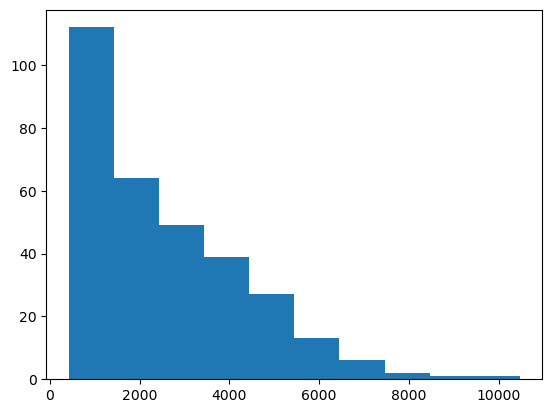

In [26]:
plt.hist(boulder['SQFT'])

(array([213.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.000000e+00, 1.543340e+05, 3.086670e+05, 4.630000e+05,
        6.173330e+05, 7.716660e+05, 9.259990e+05, 1.080332e+06,
        1.234665e+06, 1.388998e+06, 1.543331e+06]),
 <BarContainer object of 10 artists>)

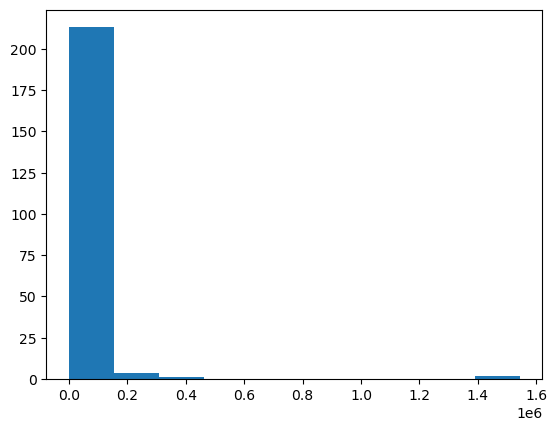

In [27]:
plt.hist(boulder['LOT.SIZE'])

In [28]:
boulder = boulder[boulder['LOT.SIZE'] < 5e+05]

In [29]:
boulder.head()

,ADDRESS,ZIP,LIST.PRICE,BEDS,BATHS,SQFT,LOT.SIZE,YEAR.BUILT,PARKING.SPOTS,PARKING.TYPE,DAYS.ON.MARKET,LATITUDE,LONGITUDE,Condo/Coop,Single Family Residential
0,1029 Paragon Dr,0,895000,4.0,2.50,3040.0,54886.0,1961.0,2,Garage,349,39.977175,-105.183189,0,1
1,300 S 68th St,0,659000,3.0,2.75,2920.0,38754.0,1966.0,2,Garage,81,39.980843,-105.193400,0,1
2,6881 Marshall Dr,0,1840000,4.0,3.25,3845.0,46609.0,2005.0,2,Garage,19,39.962634,-105.192832,0,1
5,4651 Eldorado Springs Dr,0,6499000,4.0,5.00,5588.0,223463.0,2008.0,3,Garage,116,39.947898,-105.245487,0,1
6,2255 Hillsdale Cir,1,1500000,4.0,3.50,3934.0,40864.0,2014.0,2,Garage,130,39.983040,-105.262619,0,1


In [30]:
boulder['PARKING.TYPE'].fillna(value = 'Missing', inplace = True)

In [31]:
parkDum = pd.get_dummies(boulder['PARKING.TYPE'])

In [32]:
parkDum.head()

,Garage,Missing
0,1,0
1,1,0
2,1,0
5,1,0
6,1,0


In [33]:
boulder.drop(columns = 'PARKING.TYPE', axis =1, inplace = True)

In [34]:
boulder = pd.concat([boulder, parkDum['Garage']], axis = 1)

(array([180.,  25.,  10.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 1.3170e+02, 2.6240e+02, 3.9310e+02, 5.2380e+02,
        6.5450e+02, 7.8520e+02, 9.1590e+02, 1.0466e+03, 1.1773e+03,
        1.3080e+03]),
 <BarContainer object of 10 artists>)

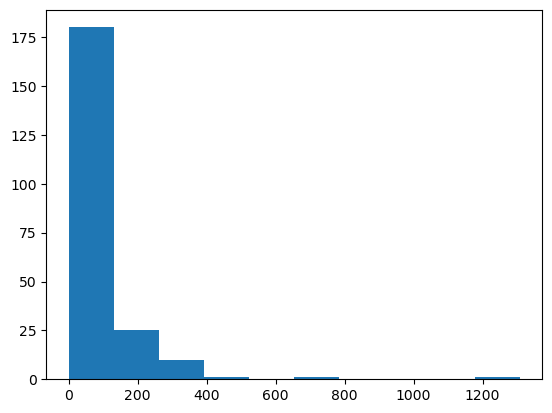

In [35]:
plt.hist(boulder['DAYS.ON.MARKET'])

In [36]:
boulder.isna().sum()

ADDRESS                      0
ZIP                          0
LIST.PRICE                   0
BEDS                         0
BATHS                        0
SQFT                         0
LOT.SIZE                     0
YEAR.BUILT                   0
PARKING.SPOTS                0
DAYS.ON.MARKET               0
LATITUDE                     0
LONGITUDE                    0
Condo/Coop                   0
Single Family Residential    0
Garage                       0
dtype: int64

In [37]:
boulder.head()

,ADDRESS,ZIP,LIST.PRICE,BEDS,BATHS,SQFT,LOT.SIZE,YEAR.BUILT,PARKING.SPOTS,DAYS.ON.MARKET,LATITUDE,LONGITUDE,Condo/Coop,Single Family Residential,Garage
0,1029 Paragon Dr,0,895000,4.0,2.50,3040.0,54886.0,1961.0,2,349,39.977175,-105.183189,0,1,1
1,300 S 68th St,0,659000,3.0,2.75,2920.0,38754.0,1966.0,2,81,39.980843,-105.193400,0,1,1
2,6881 Marshall Dr,0,1840000,4.0,3.25,3845.0,46609.0,2005.0,2,19,39.962634,-105.192832,0,1,1
5,4651 Eldorado Springs Dr,0,6499000,4.0,5.00,5588.0,223463.0,2008.0,3,116,39.947898,-105.245487,0,1,1
6,2255 Hillsdale Cir,1,1500000,4.0,3.50,3934.0,40864.0,2014.0,2,130,39.983040,-105.262619,0,1,1


In [38]:
boulder.shape

(218, 15)

In [39]:
scaledPrice = []
for i in boulder['LIST.PRICE']:
    listScale = i / 1000
    scaledPrice.append(listScale)
boulder['LIST.PRICE'] = scaledPrice

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X = boulder.drop(['LIST.PRICE', 'ADDRESS'], axis=1)
y = boulder['LIST.PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [44]:
lr = LinearRegression()
pred = lr.fit(X_train, y_train).predict(X_test)
print(f"score: {lr.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

score: 0.789057370731484
mse: 332042.64436669636


In [45]:
(mean_squared_error(y_test, pred))**(1/2)

576.2314156367182

In [46]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [47]:
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

score: 0.23678275439370244
mse: 1201372.4932516776


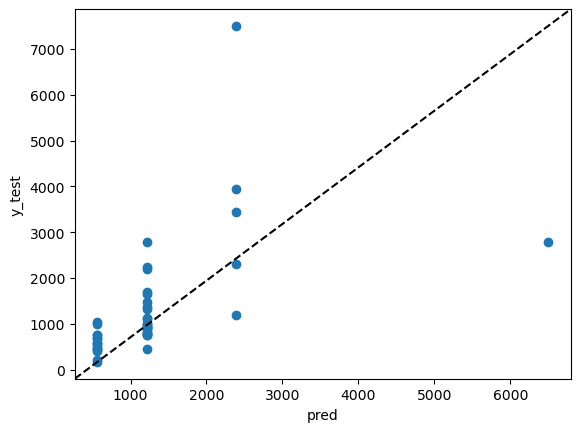

In [48]:
pred = regr.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print(f"score: {regr.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

In [49]:
(mean_squared_error(y_test, pred))**(1/2)

1096.071390581689

In [50]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=15, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=15, random_state=1)

score: 0.6981895044552301
mse: 475076.8272198916


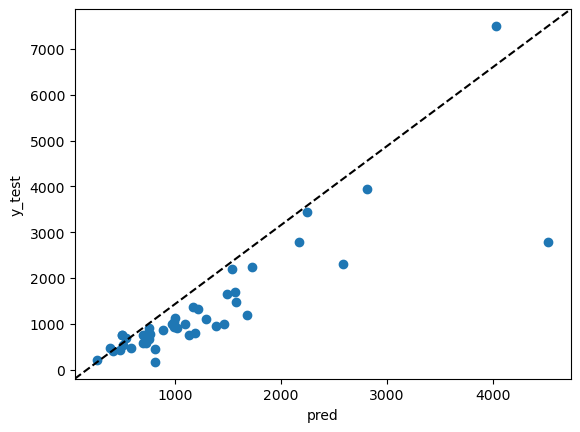

In [51]:
pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
print(f"score: {regr1.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

In [52]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

pred = regr2.predict(X_test)
print(f"score: {regr2.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

score: 0.6699875471465702
mse: 519469.24099398963


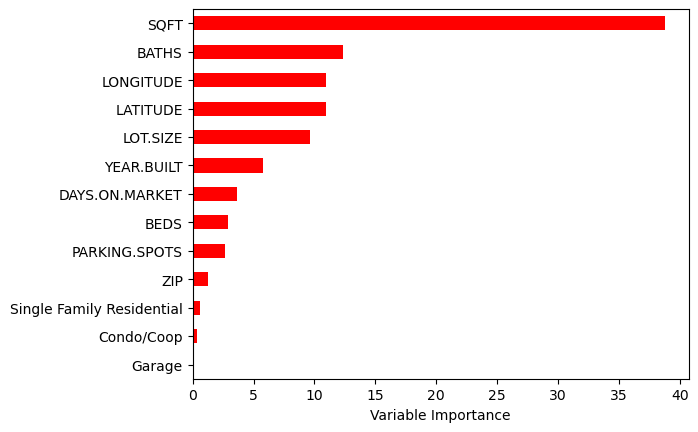

In [53]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [54]:
# Random forests: using 3 features
regr3 = RandomForestRegressor(max_features=4, random_state=1)
regr3.fit(X_train, y_train)

pred = regr3.predict(X_test)
print(f"score: {regr3.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

score: 0.645707362274812
mse: 557688.4327168175


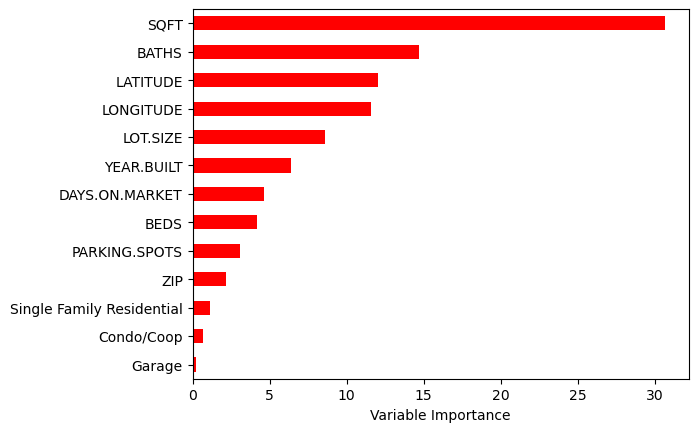

In [55]:
Importance = pd.DataFrame({'Importance':regr3.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [56]:
regrb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=3, random_state=1)
regrb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

In [57]:
print(f"score: {regrb.score(X_test, y_test)}")
print(f"mse: {mean_squared_error(y_test, pred)}")

score: 0.6058005595365611
mse: 557688.4327168175


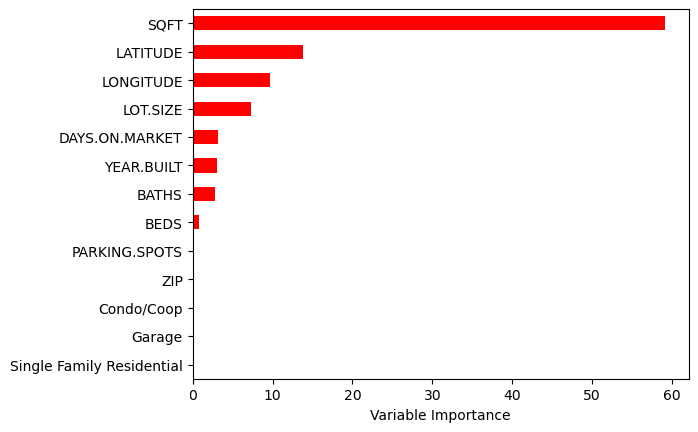

In [58]:
Importance = pd.DataFrame({'Importance':regrb.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [59]:
regrb2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=1)
regrb2.fit(X_train, y_train)
mean_squared_error(y_test, regrb2.predict(X_test))

843251.3590427078

In [60]:
# Ridge

In [61]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 13)

In [64]:
ridge.score(X, y)

0.7466593004746789

Text(0, 0.5, 'weights')

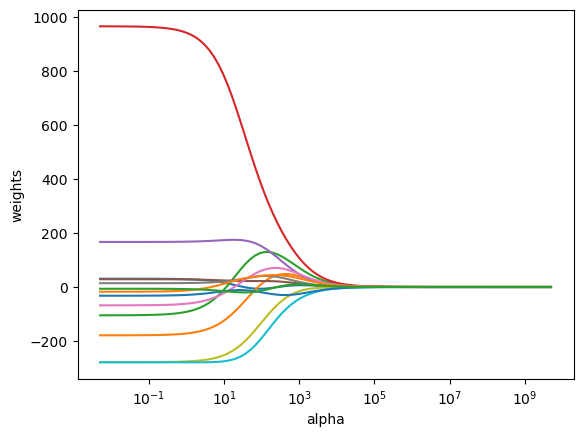

In [65]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [74]:
X_raw = boulder.drop(['LIST.PRICE', 'ADDRESS'], axis=1)
y = boulder['LIST.PRICE']

In [75]:
X_train_raw, X_test_raw , y_train, y_test = train_test_split(X_raw, y, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [76]:
ridge2 = Ridge(alpha=4)
ridge2.fit(X_train, y_train)             
pred2 = ridge2.predict(X_test)           
print(pd.Series(ridge2.coef_, index=X_raw.columns)) 
print(mean_squared_error(y_test, pred2))        

ZIP                          125.043371
BEDS                          22.787920
BATHS                         48.062505
SQFT                         610.982316
LOT.SIZE                     233.939893
YEAR.BUILT                    36.492449
PARKING.SPOTS                 20.996404
DAYS.ON.MARKET                43.053482
LATITUDE                    -400.769336
LONGITUDE                   -274.009546
Condo/Coop                    -0.756509
Single Family Residential     -1.245482
Garage                         5.411656
dtype: float64
344406.5723189703


In [81]:
ridge3 = Ridge(alpha=0)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)           
print(pd.Series(ridge3.coef_, index=X_raw.columns)) 
print(mean_squared_error(y_test, pred3)) 

ZIP                          181.133467
BEDS                          -6.496766
BATHS                        -11.824102
SQFT                         724.270058
LOT.SIZE                     247.782820
YEAR.BUILT                    46.780949
PARKING.SPOTS                -10.991757
DAYS.ON.MARKET                31.344930
LATITUDE                    -453.010054
LONGITUDE                   -276.345384
Condo/Coop                    -9.560285
Single Family Residential    -26.504948
Garage                        13.810860
dtype: float64
337011.4356234004


In [82]:
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

9.369087114301934

In [83]:
pred = ridgecv.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index=X_raw.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))

ZIP                           81.760260
BEDS                          43.386179
BATHS                         91.091298
SQFT                         522.058343
LOT.SIZE                     220.595178
YEAR.BUILT                    28.452007
PARKING.SPOTS                 43.960631
DAYS.ON.MARKET                52.955362
LATITUDE                    -350.336628
LONGITUDE                   -262.007688
Condo/Coop                     0.041361
Single Family Residential     14.554637
Garage                        -0.098211
dtype: float64
356156.89158270444


In [84]:
ridgeT = Ridge()
scores = []
scoremin = np.inf
alphamin = 0
for a in alphas:
    ridgeT.set_params(alpha=a)
    ridgeT.fit(X_train, y_train)
    scores.append(mean_squared_error(y_test, ridgeT.predict(X_test)))
    if scores[-1] < scoremin:
        scoremin = scores[-1]
        alphamin = a
print(scoremin)
print(alphamin)

337016.7766789986
0.005


In [85]:
ridge5 = Ridge(alpha=ridgecv.alpha_)
X_S = scaler.fit_transform(X_raw)
ridge5.fit(X_S, y)
pd.Series(ridge5.coef_, index=X_raw.columns)

ZIP                           16.628456
BEDS                        -126.728043
BATHS                        -13.695013
SQFT                         788.210190
LOT.SIZE                     173.070716
YEAR.BUILT                    24.412160
PARKING.SPOTS                -24.618097
DAYS.ON.MARKET                20.113150
LATITUDE                    -253.434492
LONGITUDE                   -275.024017
Condo/Coop                   -15.833319
Single Family Residential     11.118721
Garage                       -14.950235
dtype: float64

In [ ]:
# Lasso

Text(0, 0.5, 'weights')

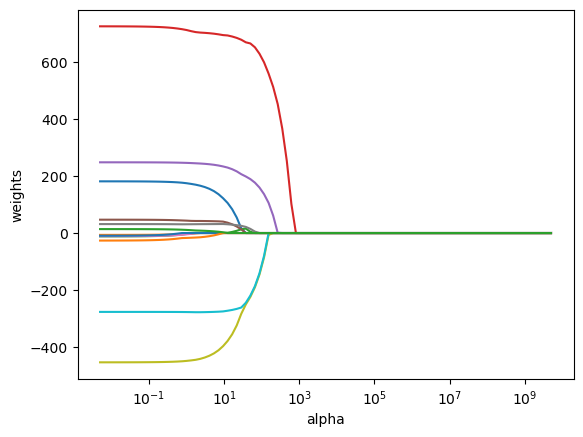

In [86]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [87]:
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lassocv.fit(X_train, y_train)

mean_squared_error(y_test, lassocv.predict(X_test))

314761.14724951645

In [88]:
pd.Series(lassocv.coef_, index=X_raw.columns)

ZIP                           83.441603
BEDS                          -0.000000
BATHS                          3.857870
SQFT                         688.517997
LOT.SIZE                     223.620399
YEAR.BUILT                    30.543629
PARKING.SPOTS                  0.000000
DAYS.ON.MARKET                29.305108
LATITUDE                    -354.725130
LONGITUDE                   -269.471047
Condo/Coop                     0.000000
Single Family Residential     -0.000000
Garage                         0.000000
dtype: float64

In [89]:
lasso1 = Lasso(alpha=lassocv.alpha_, max_iter=10000)
# X_S = scaler.transform(X_raw)
lasso1.fit(X_S, y)
pd.Series(lasso1.coef_, index=X_raw.columns)

ZIP                            0.000000
BEDS                        -131.799215
BATHS                         -5.369412
SQFT                         819.142128
LOT.SIZE                     160.663421
YEAR.BUILT                     0.000000
PARKING.SPOTS                -21.179786
DAYS.ON.MARKET                 0.000000
LATITUDE                    -230.639485
LONGITUDE                   -264.024884
Condo/Coop                    -0.000000
Single Family Residential      0.000000
Garage                        -5.720994
dtype: float64